# Multi-View Geometry 1
## $\color{greenyellow}{\text{Direct Linear Transform algorithm}}$ 


In [1]:
# useful imports for the exercise
%matplotlib inline

import os 
from pathlib import Path

import cv2
import numpy as np
import matplotlib.pyplot as plt

# change base folder to parent
import os
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('..')
# print(os.getcwd())

from src.point_plot_utils import parse_points, plot_2d_points

#### $\color{gold}{\text{Data preparation}}$
Our goal is to estimate the camera projection matrix $P$ using correspondences 3D world coordinates to 2D image coordinates. For this purpose, we choose a set of 3D world points $X_i$ and their corresponding 2D image points $x_i$ and we need at least 6 points to estimate the camera projection matrix. We have 2 images of a rubik's cube and we have annotated 7 points in each image stored in the files `data/cube1_points.txt` and `data/cube_2_points.txt`. We will load these points and use them to estimate the camera projection matrix.

In [2]:
# Setting proper file paths
assignment_root = Path(os.path.abspath(''))
imgs_path = assignment_root / 'data'

cube_img_paths = [str(imgs_path / 'cube-01.jpg'), str(imgs_path / 'cube-02.jpg')]
cube_points_file_paths = [str(imgs_path / 'cube_1_points.txt'), str(imgs_path / 'cube_2_points.txt')]

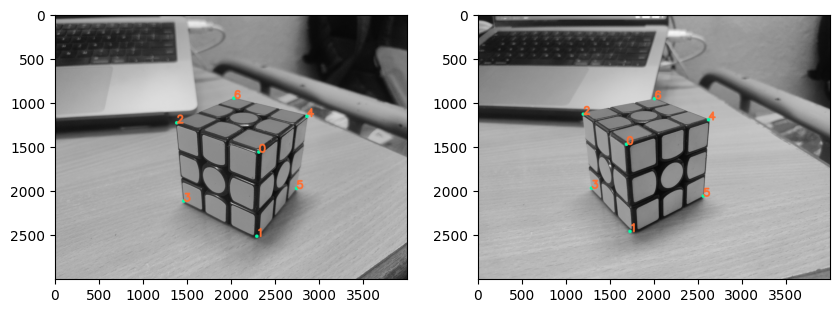

In [3]:
# Visualizing all our points on the 2 images
files_count = len(cube_img_paths)
plt.figure(figsize=(10,10)) 

for i, cube in enumerate([(parse_points(cube_points_file_paths[i])[0], cube_img_paths[i]) for i in range(files_count)]):
    cube_points_2d_gt, cube_image_path = cube
    plt.subplot(files_count//4 + 1 ,files_count%4 ,i+1)
    temp_plot = plot_2d_points(cube_points_2d_gt, cube_image_path, plot_labels=True)
    plt.imshow(cv2.cvtColor(temp_plot, cv2.COLOR_BGR2RGB))

# Showing our plot
plt.show()

#### $\color{gold}{\text{Projection Matrix Estimation using DLT}}$
Your task is to implement a crucial step of the Direct Linear Transform algorithm, namely the `convert_x` and `convert_y` functions. These functions will convert the 3D world points and 2D image points into the form required to estimate the camera projection matrix. The SVD of the matrix $Q$ is used to estimate the camera projection matrix $P$ and has been implemented for you.

In [ ]:
def compute_P(points_2d, points_3d):
    
    # 🟨 FILL THIS SECTION AND WATCH YOUR DLT IMPLEMENTATION COME TO LIFE! 🟨
    # Define lambda functions for conversion of known 2D 3D point correspondences
    # Hint: They should return a 1x12 matrix each
    
    # convert_x = lambda p,q: []
    # convert_y = lambda p,q: []
    ################################################################################

    # Building our Q matrix by stacking the x and y equations for each point
    Q = []
    for coords_2d, coords_3d in list(zip(points_2d, points_3d)):
        Q.append(convert_x(coords_2d, coords_3d))
        Q.append(convert_y(coords_2d, coords_3d))

    Q = np.array(Q)
    
    # Computing SVD of Q
    u, s, vh = np.linalg.svd(Q, full_matrices=True)

    # Last column of V corresponds to smallest singular value
    P = vh[-1, :]
    P = P.reshape(3, 4)
    # print(f"Projection Matrix:\n{P}")
    
    return(P)

In [ ]:
class CUBE_IMAGE:
    
    _registry = []
    
    def __init__(self, image_path, points_file_path):
        self.image_path = image_path
        self.points_file_path = points_file_path
        
        self.points_2d_gt, self.points_3d_gt = parse_points(self.points_file_path)
        
        self.points_2d_pred = None
        self.points_3d_pred = None
        
        self.proj_matrix = compute_P(self.points_2d_gt, self.points_3d_gt)
        
        CUBE_IMAGE._registry.append(self)

In [ ]:
cube_1 = CUBE_IMAGE(cube_img_paths[0], cube_points_file_paths[0])
cube_2 = CUBE_IMAGE(cube_img_paths[1], cube_points_file_paths[1])

In [ ]:
P1 = cube_1.proj_matrix
P2 = cube_2.proj_matrix

print(f"Projection Matrix 1:\n{P1}")
print()
print(f"Projection Matrix 2:\n{P2}")

#### $\color{gold}{\text{Anatomy of the Projection Matrix}}$
Let's run a fun sanity check using our knowledge of the projection matrix to see if the estimated projection matrix is correct. We will do so by seeing if we are able to locate the image of the world origin using the estimated projection matrix.

In [ ]:
def extract_world_origin(P):
    '''Extracts the world origin from a projection matrix as the last column of the matrix'''
    M = P[:, :3]
    p4 = P[:, 3]
    x, y, w = p4
    return x/w, y/w

world_o_1_pred = extract_world_origin(P1)
world_o_2_pred = extract_world_origin(P2)

print(f"World Origin in Image 1: {world_o_1_pred}")
print(f"World Origin in Image 2: {world_o_2_pred}")

# do these match the world origin we annotated ?
world_o_1_gt = cube_1.points_2d_gt[0]
world_o_2_gt = cube_2.points_2d_gt[0]

print(f"\nWorld Origin in Image 1 (GT): {world_o_1_gt}")
print(f"World Origin in Image 2 (GT): {world_o_2_gt}")

#### $\color{aquamarine}{\text{⬆ Are they close ? Lets plot them below}}$

In [ ]:
# plot the predicted world origin on the images
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
temp_plot = plot_2d_points([world_o_1_pred], cube_1.image_path, plot_labels=True)
plt.imshow(cv2.cvtColor(temp_plot, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
temp_plot = plot_2d_points([world_o_2_pred], cube_2.image_path, plot_labels=True)
plt.imshow(cv2.cvtColor(temp_plot, cv2.COLOR_BGR2RGB))
plt.show()

#### $\color{gold}{\text{Self Study: Decomposition of the Projection Matrix to K, R, and t}}$

In [ ]:
def estimate_parameters(P):
    """
    Estimates the intrinsic, extrinsic, and camera center parameters from the projection matrix P
    Args:
        P: Projection matrix
    Returns:
        K: Intrinsic parameters
        R: Rotation matrix
        t: Translation vector
    """

    # breaking P into familiar M and p4 notation
    M = P[:, :3]
    p4 = P[:, 3]

    # Your code here
    K = None
    R = None
    t = None

    return K, R, t

K_pred, R_pred, t_pred = estimate_parameters(P1)

print(f"Intrinsic Matrix:\n{K_pred}")
print(f"\nRotation Matrix:\n{R_pred}")
print(f"\nTranslation Vector:\n{t_pred}")